# Phone Prices

## Simple  Linear Regression

### Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
from IPython.display import display, clear_output

import time

### Phone Prices Data

In [2]:
# Memory options in GB
m_values = [4, 8, 16, 32, 64, 128, 256, 512, 1024]

# Generate data for 100 phones with price noise
phones = []
for i in range(1, 101):
    memory = random.choice(m_values)
    base_price = 100 + 3 * memory
    noise = random.uniform(-0.07, 0.07) * base_price
    final_price = round(base_price + noise, 2)  # Round to 2 decimal places
    phones.append({'Phone_ID': i, 'Memory_GB': memory, 'Price_$': final_price})

# Convert to DataFrame
df = pd.DataFrame(phones)

# Display first few rows
df.head()

,Phone_ID,Memory_GB,Price_$
0,1,512,1702.88
1,2,256,908.23
2,3,512,1699.93
3,4,32,193.75
4,5,16,154.12


### Plotting the Best Fit Line

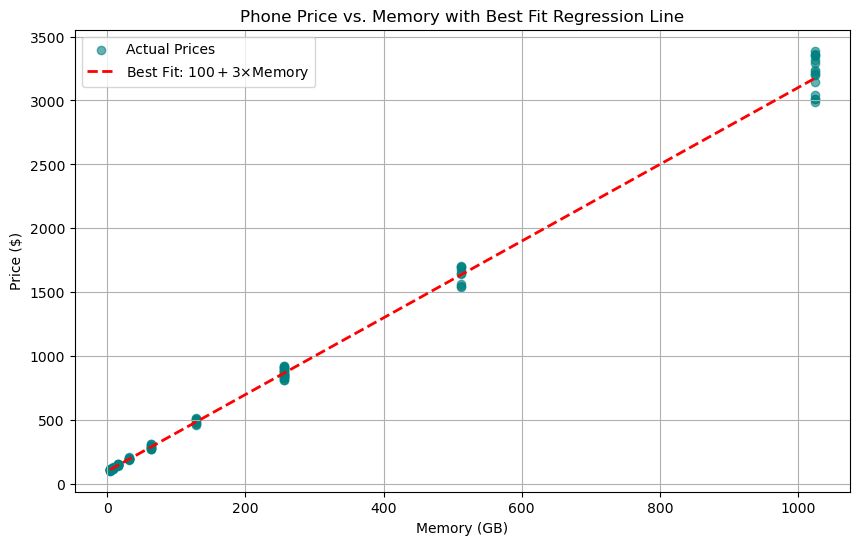

In [3]:
# Scatter plot of actual data
plt.figure(figsize=(10, 6))
plt.scatter(df['Memory_GB'], df['Price_$'], color='teal', alpha=0.6, label='Actual Prices')

# Dashed best fit line
memory_range = np.linspace(df['Memory_GB'].min(), df['Memory_GB'].max(), 100)
best_fit_prices = 100 + 3 * memory_range
plt.plot(memory_range, best_fit_prices, color='red', linestyle='--', linewidth=2, label='Best Fit: $100 + $3×Memory')

# Labels and Title
plt.xlabel('Memory (GB)')
plt.ylabel('Price ($)')
plt.title('Phone Price vs. Memory with Best Fit Regression Line')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## The Price is Right Game Trial - Demo Mode!

In [4]:
def generate_phone_price(memory_gb):
    base_price = 100 + 3 * memory_gb
    # noise = random.uniform(-0.07, 0.07) * base_price  # ±7% noise
    noise = 0
    return round(base_price + noise, 2)

def play_demo():
    memory_options = [4, 8, 16, 32, 64, 128, 256, 512, 1024]
    
    print("🎮 Welcome to The Price Is Right – Phone Edition!")
    print("Type 'stop' or 'quit' anytime to exit.\n")

    while True:
        memory = random.choice(memory_options)
        print(f"📱 The phone has {memory} GB of memory.")
        
        guess_input = input("💰 What's your guess for the price? $")
        if guess_input.lower() in ['stop', 'quit']:
            print("\n👋 Thanks for playing! See you next time.")
            break

        try:
            guess = float(guess_input)
        except ValueError:
            print("⚠️ Please enter a valid number or type 'stop' to quit.\n")
            continue

        actual_price = generate_phone_price(memory)
        print(f"\n🎉 The actual price is: ${actual_price}")

        difference = abs(actual_price - guess)
        print(f"🧮 You were off by: ${round(difference, 2)}")

        if difference < 20:
            print("👏 Great guess!\n")
        elif difference < 50:
            print("👍 Not bad!\n")
        else:
            print("😬 Better luck next time!\n")

# Start the game
play_demo()

🎮 Welcome to The Price Is Right – Phone Edition!
Type 'stop' or 'quit' anytime to exit.

📱 The phone has 64 GB of memory.


💰 What's your guess for the price? $ 192



🎉 The actual price is: $292
🧮 You were off by: $100.0
😬 Better luck next time!

📱 The phone has 128 GB of memory.


💰 What's your guess for the price? $ 478



🎉 The actual price is: $484
🧮 You were off by: $6.0
👏 Great guess!

📱 The phone has 8 GB of memory.


💰 What's your guess for the price? $ 124



🎉 The actual price is: $124
🧮 You were off by: $0.0
👏 Great guess!

📱 The phone has 128 GB of memory.


💰 What's your guess for the price? $ 484



🎉 The actual price is: $484
🧮 You were off by: $0.0
👏 Great guess!

📱 The phone has 256 GB of memory.


💰 What's your guess for the price? $ 850



🎉 The actual price is: $868
🧮 You were off by: $18.0
👏 Great guess!

📱 The phone has 128 GB of memory.


💰 What's your guess for the price? $ 485



🎉 The actual price is: $484
🧮 You were off by: $1.0
👏 Great guess!

📱 The phone has 16 GB of memory.


💰 What's your guess for the price? $ stop



👋 Thanks for playing! See you next time.


## The Price is Right Game with Score!

In [5]:
## def generate_phone_price(memory_gb):
    return 100 + 3 * memory_gb  # No noise

def play_game():
    memory_options = [4, 8, 16, 32, 64, 128, 256, 512, 1024]
    score = 0
    rounds = 0
    start_time = time.time()
    time_limit = 180  # 3 minutes

    # DataFrame to track results
    results = []

    print("🎮 Welcome to The Price Is Right – Phone Edition!")
    print("You have 3 minutes to guess as many prices as you can.")
    print("Type 'stop' or 'quit' anytime to exit.\n")

    while True:
        if time.time() - start_time > time_limit:
            print("\n⏰ Time's up!")
            break

        memory = random.choice(memory_options)
        predicted_price = generate_phone_price(memory)
        print(f"📱 The phone has {memory} GB of memory.")

        guess_input = input("💰 What's your guess for the price? $")
        if guess_input.lower() in ['stop', 'quit']:
            print("\n👋 Game stopped by player.")
            break

        try:
            user_estimate = float(guess_input)
        except ValueError:
            print("⚠️ Invalid input. Please enter a number.\n")
            continue

        rounds += 1
        percent_error = abs(predicted_price - user_estimate) / predicted_price * 100
        accuracy = round(100 - percent_error, 2)

        # Scoring based on percentage error
        if percent_error <= 5:
            round_score = 10
            feedback = "🎯 Spot on!"
        elif percent_error <= 10:
            round_score = 5
            feedback = "👍 Close!"
        elif percent_error <= 20:
            round_score = 2
            feedback = "🙂 Not bad!"
        else:
            round_score = 0
            feedback = "😬 Way off!"

        score += round_score

        print(f"{feedback} +{round_score} points")
        print(f"🧮 Actual price: ${predicted_price}")
        print(f"📉 Your error: {round(percent_error, 2)}%")
        print(f"📊 Total score: {score} | Rounds played: {rounds}\n")

        # Record round data
        results.append({
            'Memory_GB': memory,
            'User_Estimate_$': round(user_estimate, 2),
            'Predicted_Price_$': predicted_price,
            'Accuracy_%': accuracy,
            'Round_Score': round_score,
            'Total_Score': score
        })

    # Create DataFrame
    results_df = pd.DataFrame(results)
    print("🏁 Game Over!\n")
    return results_df

# Start the game
results_df = play_game()

🎮 Welcome to The Price Is Right – Phone Edition!
You have 3 minutes to guess as many prices as you can.
Type 'stop' or 'quit' anytime to exit.

📱 The phone has 64 GB of memory.


💰 What's your guess for the price? $ 292


🎯 Spot on! +10 points
🧮 Actual price: $292
📉 Your error: 0.0%
📊 Total score: 10 | Rounds played: 1

📱 The phone has 4 GB of memory.


💰 What's your guess for the price? $ 112


🎯 Spot on! +10 points
🧮 Actual price: $112
📉 Your error: 0.0%
📊 Total score: 20 | Rounds played: 2

📱 The phone has 256 GB of memory.


💰 What's your guess for the price? $ 850


🎯 Spot on! +10 points
🧮 Actual price: $868
📉 Your error: 2.07%
📊 Total score: 30 | Rounds played: 3

📱 The phone has 512 GB of memory.


💰 What's your guess for the price? $ 1650


🎯 Spot on! +10 points
🧮 Actual price: $1636
📉 Your error: 0.86%
📊 Total score: 40 | Rounds played: 4

📱 The phone has 1024 GB of memory.


💰 What's your guess for the price? $ 3136


🎯 Spot on! +10 points
🧮 Actual price: $3172
📉 Your error: 1.13%
📊 Total score: 50 | Rounds played: 5

📱 The phone has 1024 GB of memory.


💰 What's your guess for the price? $ 3172


🎯 Spot on! +10 points
🧮 Actual price: $3172
📉 Your error: 0.0%
📊 Total score: 60 | Rounds played: 6

📱 The phone has 512 GB of memory.


💰 What's your guess for the price? $ 1636


🎯 Spot on! +10 points
🧮 Actual price: $1636
📉 Your error: 0.0%
📊 Total score: 70 | Rounds played: 7

📱 The phone has 4 GB of memory.


💰 What's your guess for the price? $ 112


🎯 Spot on! +10 points
🧮 Actual price: $112
📉 Your error: 0.0%
📊 Total score: 80 | Rounds played: 8

📱 The phone has 16 GB of memory.


💰 What's your guess for the price? $ 148


🎯 Spot on! +10 points
🧮 Actual price: $148
📉 Your error: 0.0%
📊 Total score: 90 | Rounds played: 9

📱 The phone has 32 GB of memory.


💰 What's your guess for the price? $ 196


🎯 Spot on! +10 points
🧮 Actual price: $196
📉 Your error: 0.0%
📊 Total score: 100 | Rounds played: 10

📱 The phone has 512 GB of memory.


💰 What's your guess for the price? $ 1636


🎯 Spot on! +10 points
🧮 Actual price: $1636
📉 Your error: 0.0%
📊 Total score: 110 | Rounds played: 11

📱 The phone has 512 GB of memory.


💰 What's your guess for the price? $ 1636


🎯 Spot on! +10 points
🧮 Actual price: $1636
📉 Your error: 0.0%
📊 Total score: 120 | Rounds played: 12

📱 The phone has 128 GB of memory.


💰 What's your guess for the price? $ 484


🎯 Spot on! +10 points
🧮 Actual price: $484
📉 Your error: 0.0%
📊 Total score: 130 | Rounds played: 13

📱 The phone has 128 GB of memory.


💰 What's your guess for the price? $ 484


🎯 Spot on! +10 points
🧮 Actual price: $484
📉 Your error: 0.0%
📊 Total score: 140 | Rounds played: 14

📱 The phone has 32 GB of memory.


💰 What's your guess for the price? $ 196


🎯 Spot on! +10 points
🧮 Actual price: $196
📉 Your error: 0.0%
📊 Total score: 150 | Rounds played: 15

📱 The phone has 128 GB of memory.


💰 What's your guess for the price? $ 484


🎯 Spot on! +10 points
🧮 Actual price: $484
📉 Your error: 0.0%
📊 Total score: 160 | Rounds played: 16

📱 The phone has 64 GB of memory.


💰 What's your guess for the price? $ 292


🎯 Spot on! +10 points
🧮 Actual price: $292
📉 Your error: 0.0%
📊 Total score: 170 | Rounds played: 17

📱 The phone has 4 GB of memory.


💰 What's your guess for the price? $ stop



👋 Game stopped by player.
🏁 Game Over!



### Results and Score

In [6]:
print("📋 Final Score Summary:")
results_df

📋 Final Score Summary:


,Memory_GB,User_Estimate_$,Predicted_Price_$,Accuracy_%,Round_Score,Total_Score
0,64,292.0,292,100.00,10,10
1,4,112.0,112,100.00,10,20
2,256,850.0,868,97.93,10,30
3,512,1650.0,1636,99.14,10,40
4,1024,3136.0,3172,98.87,10,50
5,1024,3172.0,3172,100.00,10,60
6,512,1636.0,1636,100.00,10,70
7,4,112.0,112,100.00,10,80
8,16,148.0,148,100.00,10,90
9,32,196.0,196,100.00,10,100


### Plotting your Estimates Against Model Predictions

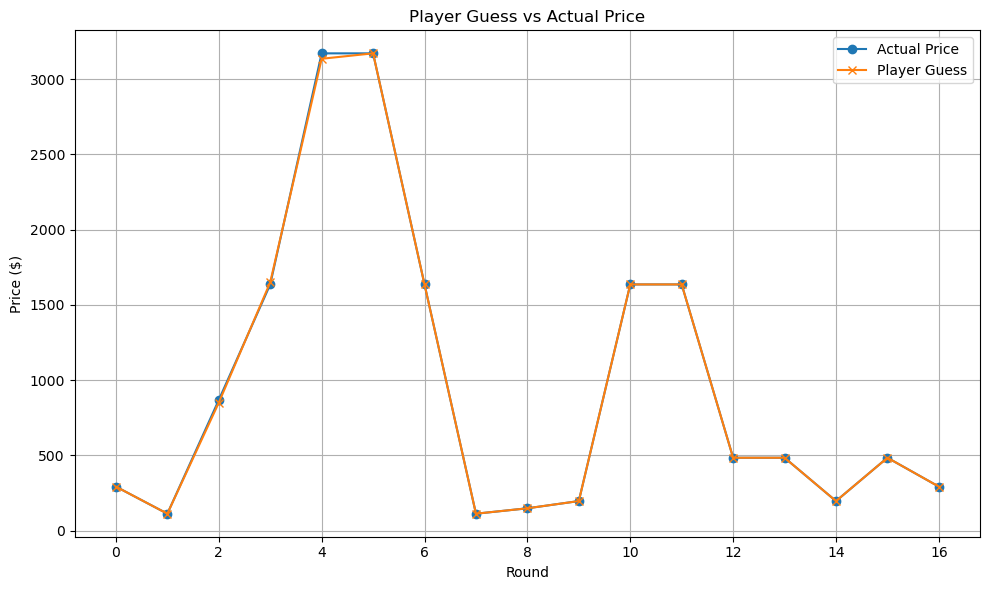

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['Predicted_Price_$'], label='Actual Price', marker='o')
plt.plot(results_df['User_Estimate_$'], label='Player Guess', marker='x')
plt.title('Player Guess vs Actual Price')
plt.xlabel('Round')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

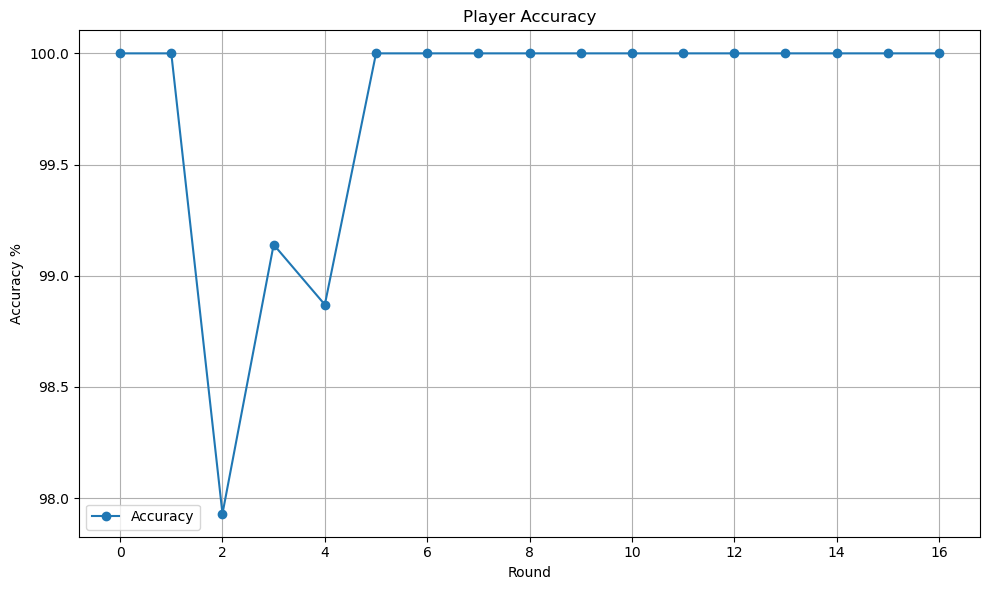

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['Accuracy_%'], label='Accuracy', marker='o')

plt.title('Player Accuracy')
plt.xlabel('Round')
plt.ylabel('Accuracy %')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Congratulations on Completing your First AI Lab !

# Well Done!